In [25]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime,timedelta
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('dataset\irradiance_dataset')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\1717908015.py:1: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('dataset\irradiance_dataset')


,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime
0,2022032100,20.10,15.75,90.91,0.0,2022-03-21 00:00:00
1,2022032101,20.02,15.70,90.85,0.0,2022-03-21 01:00:00
2,2022032102,19.95,15.67,90.79,0.0,2022-03-21 02:00:00
3,2022032103,19.89,15.60,90.78,0.0,2022-03-21 03:00:00
4,2022032104,19.76,15.48,90.81,0.0,2022-03-21 04:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21264 entries, 0 to 21263
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               21264 non-null  int64  
 1   T2M                21264 non-null  float64
 2   QV2M               21264 non-null  float64
 3   PS                 21264 non-null  float64
 4   ALLSKY_SFC_SW_DWN  21264 non-null  float64
 5   datetime           21264 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 996.9+ KB


In [6]:
df['datetime'] = pd.to_datetime(df['time'], format='%Y%m%d%H')
df.head()

,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime
0,2022032100,20.10,15.75,90.91,0.0,2022-03-21 00:00:00
1,2022032101,20.02,15.70,90.85,0.0,2022-03-21 01:00:00
2,2022032102,19.95,15.67,90.79,0.0,2022-03-21 02:00:00
3,2022032103,19.89,15.60,90.78,0.0,2022-03-21 03:00:00
4,2022032104,19.76,15.48,90.81,0.0,2022-03-21 04:00:00


In [8]:
new_df = df[['datetime','ALLSKY_SFC_SW_DWN']]
new_df = new_df.set_index('datetime')
new_df.head()

,ALLSKY_SFC_SW_DWN
datetime,
2022-03-21 00:00:00,0.0
2022-03-21 01:00:00,0.0
2022-03-21 02:00:00,0.0
2022-03-21 03:00:00,0.0
2022-03-21 04:00:00,0.0


<Axes: xlabel='datetime'>

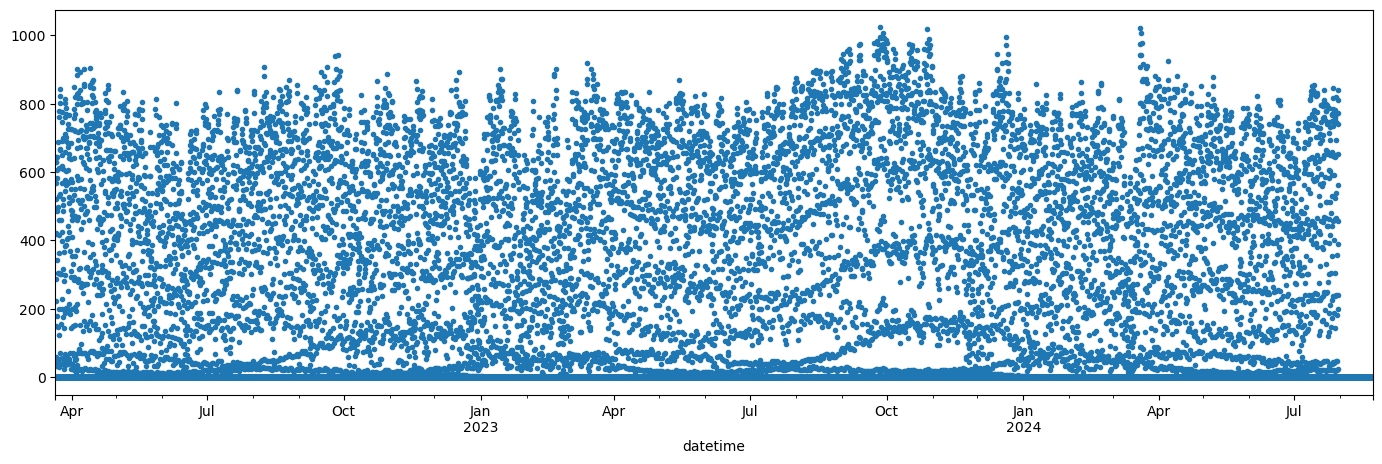

In [9]:
new_df['ALLSKY_SFC_SW_DWN'].plot(style='.', figsize=(17,5))


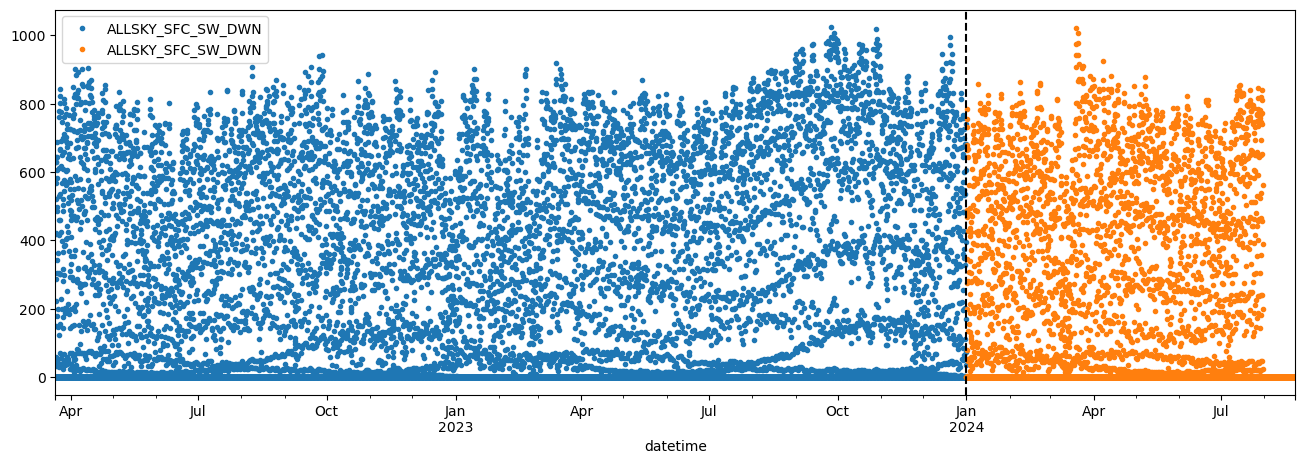

In [10]:
train = new_df.loc[new_df.index < '01-01-2024']
test = new_df.loc[new_df.index >= '01-01-2024']

fig, ax = plt.subplots(figsize=(16,5))
train.plot(ax=ax , label='train',style='.')
test.plot(ax=ax, label='test',style='.')
ax.axvline('01-01-2024',color='black',ls='--')
plt.show()

In [11]:
def create_features(df):
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df

In [13]:
data_df = create_features(new_df)
data_df.head()

,ALLSKY_SFC_SW_DWN,hour,dayofweek,quarter,month,year,dayofyear
datetime,,,,,,,
2022-03-21 00:00:00,0.0,0,0,1,3,2022,80
2022-03-21 01:00:00,0.0,1,0,1,3,2022,80
2022-03-21 02:00:00,0.0,2,0,1,3,2022,80
2022-03-21 03:00:00,0.0,3,0,1,3,2022,80
2022-03-21 04:00:00,0.0,4,0,1,3,2022,80


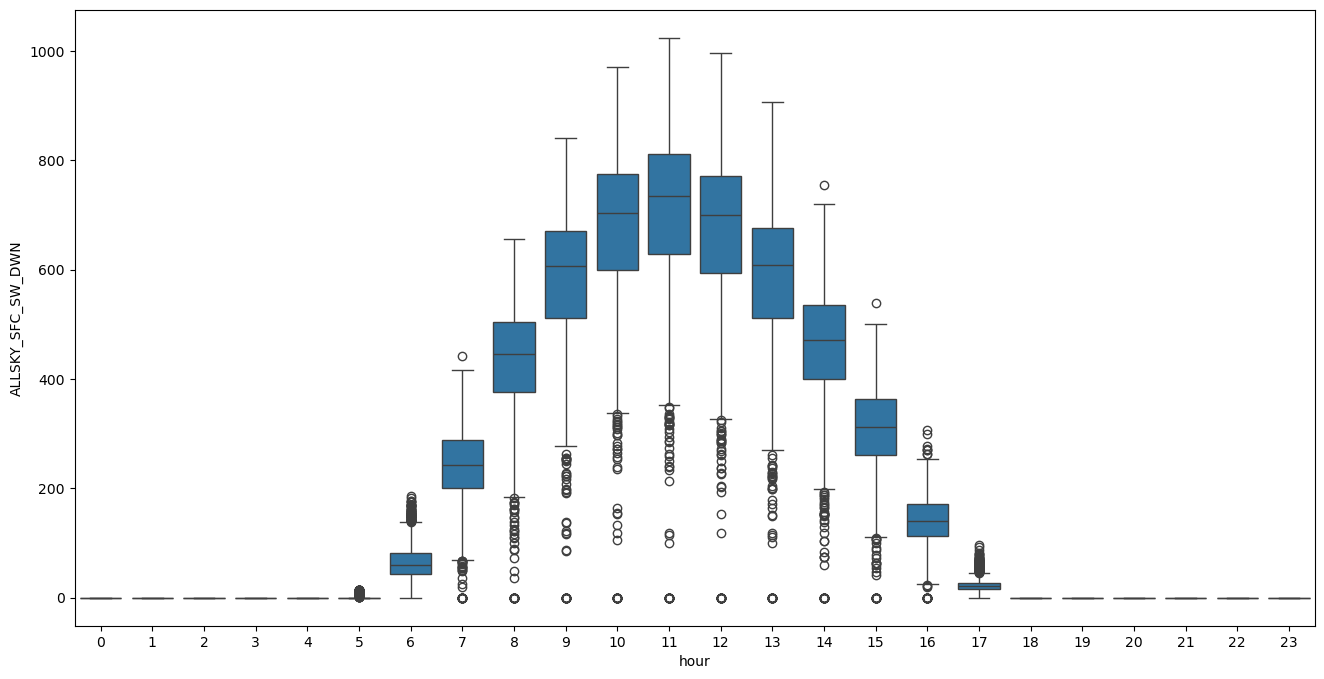

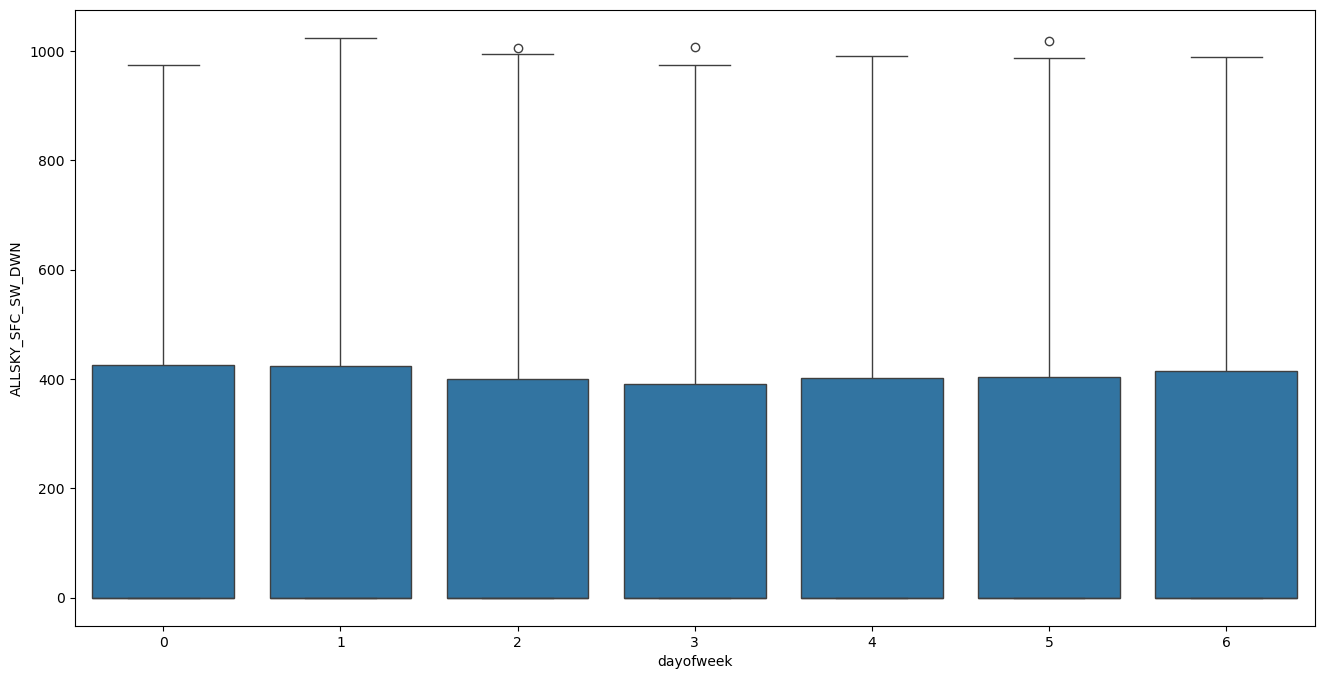

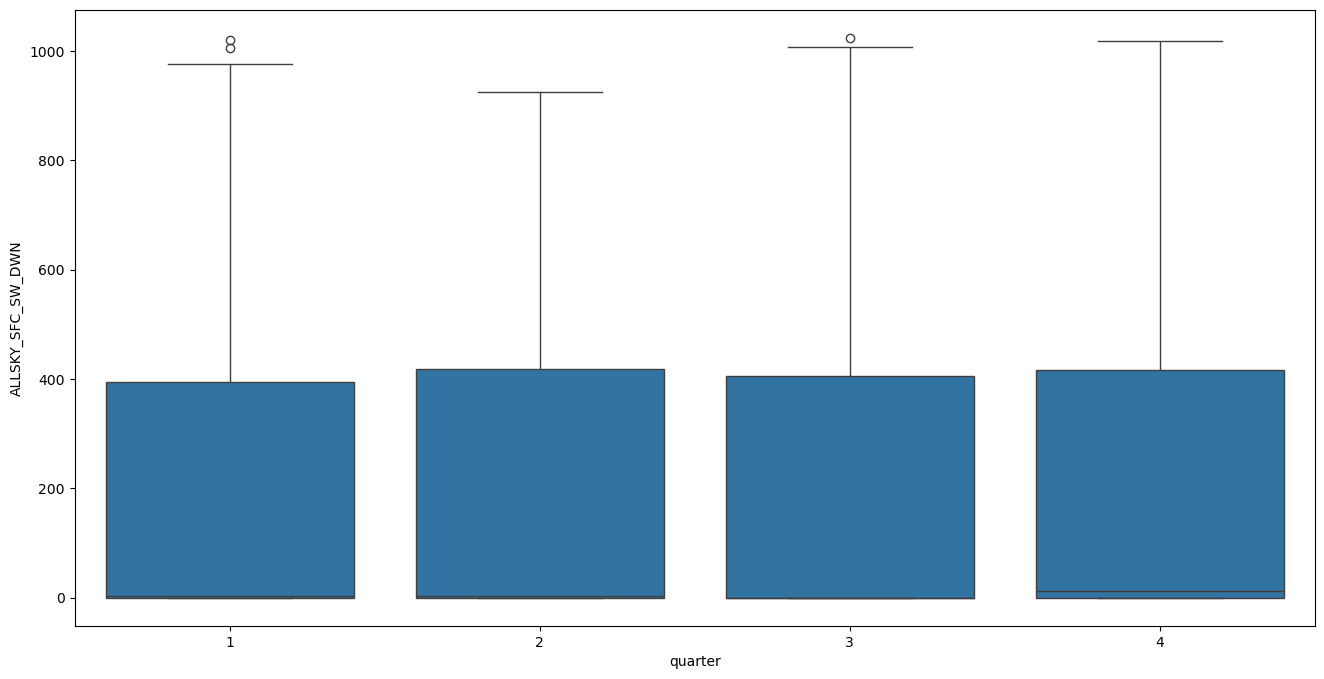

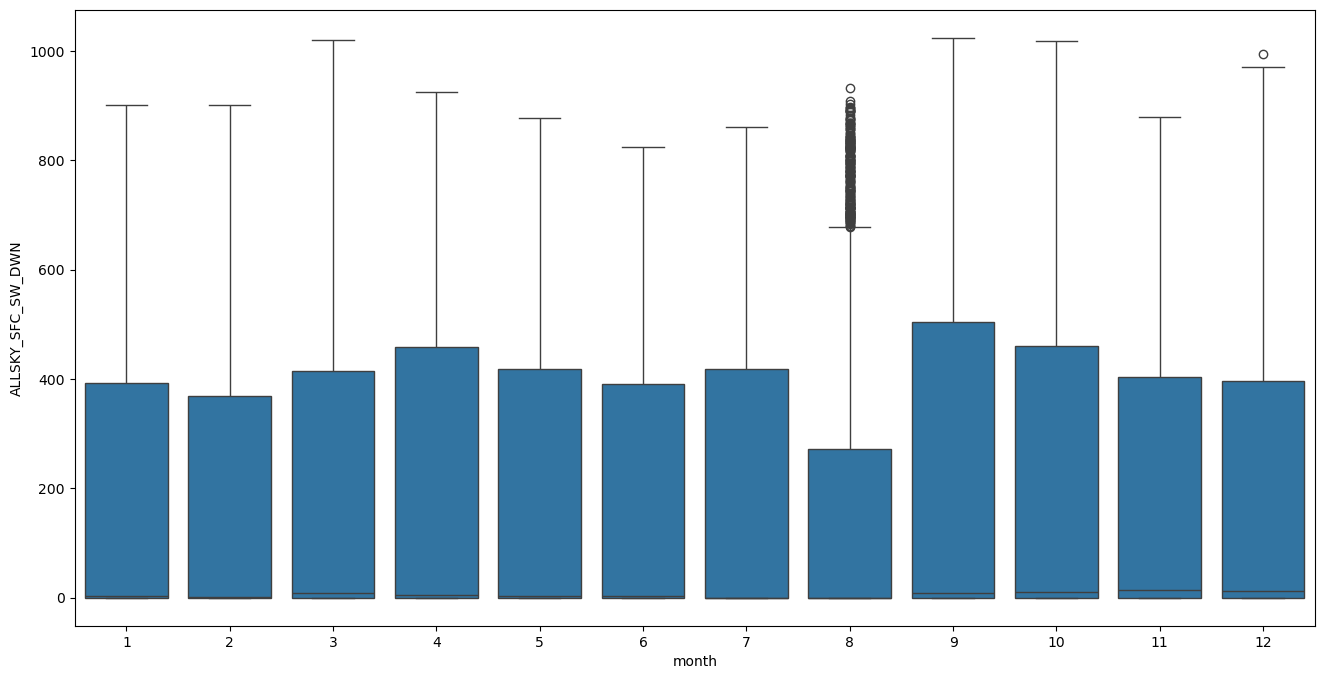

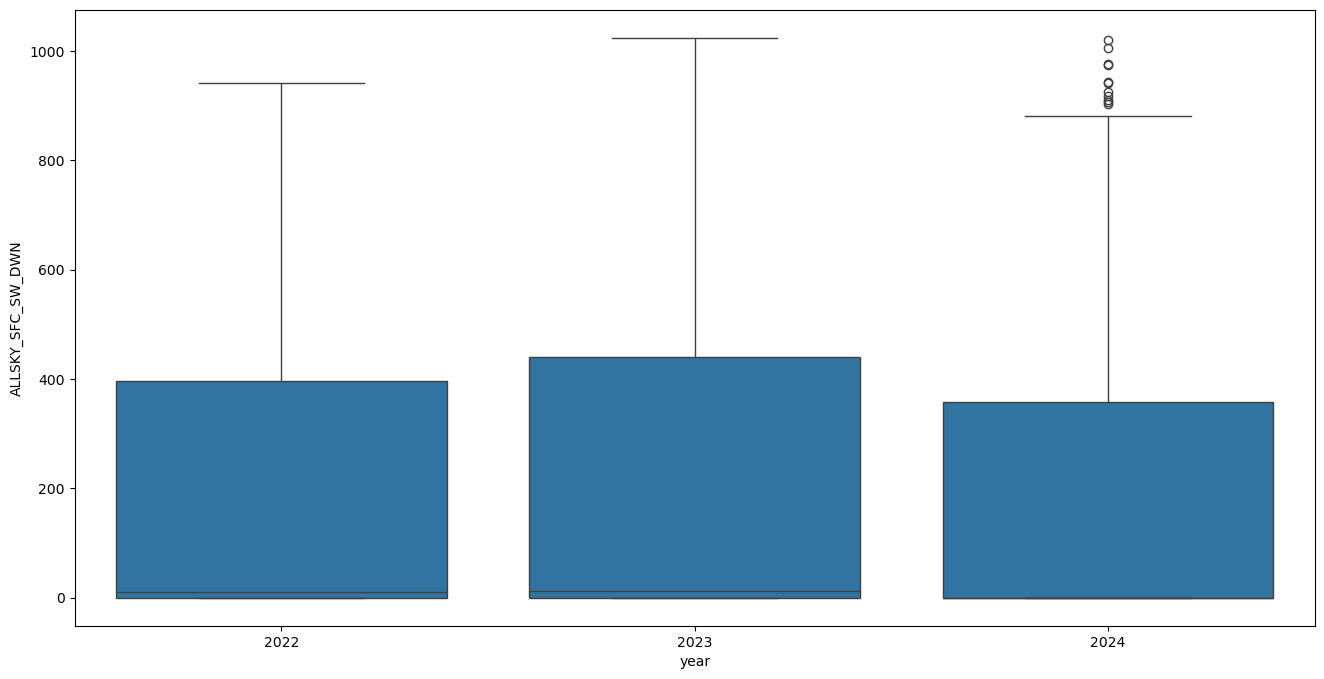

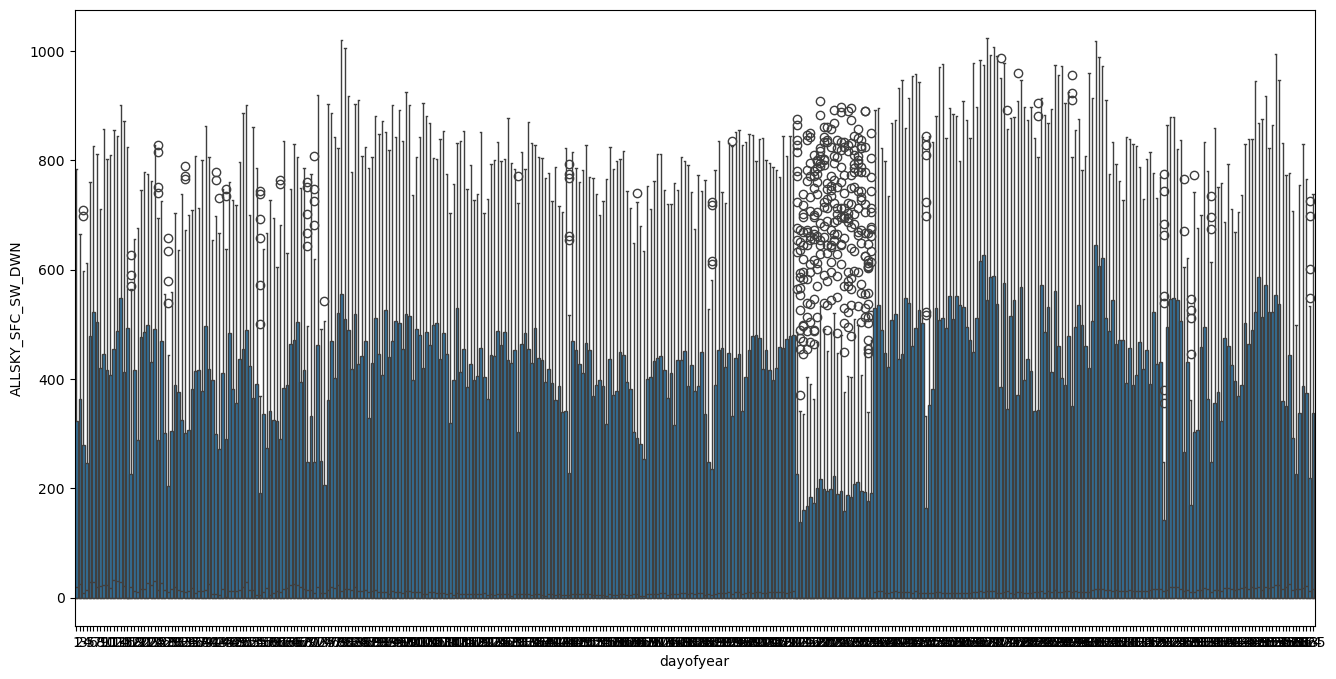

In [14]:
column = ['hour','dayofweek','quarter','month','year','dayofyear']
for i in column:
  fig, ax = plt.subplots(figsize=(16,8))
  sns.boxplot(data=data_df, x =i,y='ALLSKY_SFC_SW_DWN')
  plt.show()

In [15]:
train = create_features(train)
test = create_features(test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\1483320389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\1483320389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\1483320389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [16]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year','dayofyear']
TARGET = 'ALLSKY_SFC_SW_DWN'

x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [19]:

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 20963.081487766893
R-squared: 0.6946539345080223


In [30]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
tscv = TimeSeriesSplit(n_splits=3)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = tscv)

In [32]:
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)


RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=10)


In [40]:
# model_grid = RandomForestClassifier(max_depth=80,
#                                     max_features=3, 
#                                     min_samples_leaf=3,
#                                     min_samples_split=10)
# grid_search.fit(x_train, y_train)
y_pred_grid = grid_search.predict(x_test)

In [42]:
mse = mean_squared_error(y_test, y_pred_grid)
r2 = r2_score(y_test, y_pred_grid)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 20064.558343205685
R-squared: 0.7077417292153676


In [58]:
test['prediction1'] = y_pred
last_df = data_df.merge(test['prediction1'], how='left', left_index=True, right_index=True)
last_df

C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\4261108849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction1'] = y_pred


,ALLSKY_SFC_SW_DWN,hour,dayofweek,quarter,month,year,dayofyear,prediction1
datetime,,,,,,,,
2022-03-21 00:00:00,0.0,0,0,1,3,2022,80,NaN
2022-03-21 01:00:00,0.0,1,0,1,3,2022,80,NaN
2022-03-21 02:00:00,0.0,2,0,1,3,2022,80,NaN
2022-03-21 03:00:00,0.0,3,0,1,3,2022,80,NaN
2022-03-21 04:00:00,0.0,4,0,1,3,2022,80,NaN
...,...,...,...,...,...,...,...,...
2024-08-22 19:00:00,0.0,19,3,3,8,2024,235,0.0
2024-08-22 20:00:00,0.0,20,3,3,8,2024,235,0.0
2024-08-22 21:00:00,0.0,21,3,3,8,2024,235,0.0


In [60]:
test['prediction2'] = y_pred_grid
last_df1 = data_df.merge(test['prediction2'], how='left', left_index=True, right_index=True)
last_df1

C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\269210443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction2'] = y_pred_grid


,ALLSKY_SFC_SW_DWN,hour,dayofweek,quarter,month,year,dayofyear,prediction2
datetime,,,,,,,,
2022-03-21 00:00:00,0.0,0,0,1,3,2022,80,NaN
2022-03-21 01:00:00,0.0,1,0,1,3,2022,80,NaN
2022-03-21 02:00:00,0.0,2,0,1,3,2022,80,NaN
2022-03-21 03:00:00,0.0,3,0,1,3,2022,80,NaN
2022-03-21 04:00:00,0.0,4,0,1,3,2022,80,NaN
...,...,...,...,...,...,...,...,...
2024-08-22 19:00:00,0.0,19,3,3,8,2024,235,0.278867
2024-08-22 20:00:00,0.0,20,3,3,8,2024,235,0.278867
2024-08-22 21:00:00,0.0,21,3,3,8,2024,235,0.278867


In [61]:
last_df1.head()

,ALLSKY_SFC_SW_DWN,hour,dayofweek,quarter,month,year,dayofyear,prediction2
datetime,,,,,,,,
2022-03-21 00:00:00,0.0,0,0,1,3,2022,80,NaN
2022-03-21 01:00:00,0.0,1,0,1,3,2022,80,NaN
2022-03-21 02:00:00,0.0,2,0,1,3,2022,80,NaN
2022-03-21 03:00:00,0.0,3,0,1,3,2022,80,NaN
2022-03-21 04:00:00,0.0,4,0,1,3,2022,80,NaN


In [62]:
last_df.head()

,ALLSKY_SFC_SW_DWN,hour,dayofweek,quarter,month,year,dayofyear,prediction1
datetime,,,,,,,,
2022-03-21 00:00:00,0.0,0,0,1,3,2022,80,NaN
2022-03-21 01:00:00,0.0,1,0,1,3,2022,80,NaN
2022-03-21 02:00:00,0.0,2,0,1,3,2022,80,NaN
2022-03-21 03:00:00,0.0,3,0,1,3,2022,80,NaN
2022-03-21 04:00:00,0.0,4,0,1,3,2022,80,NaN


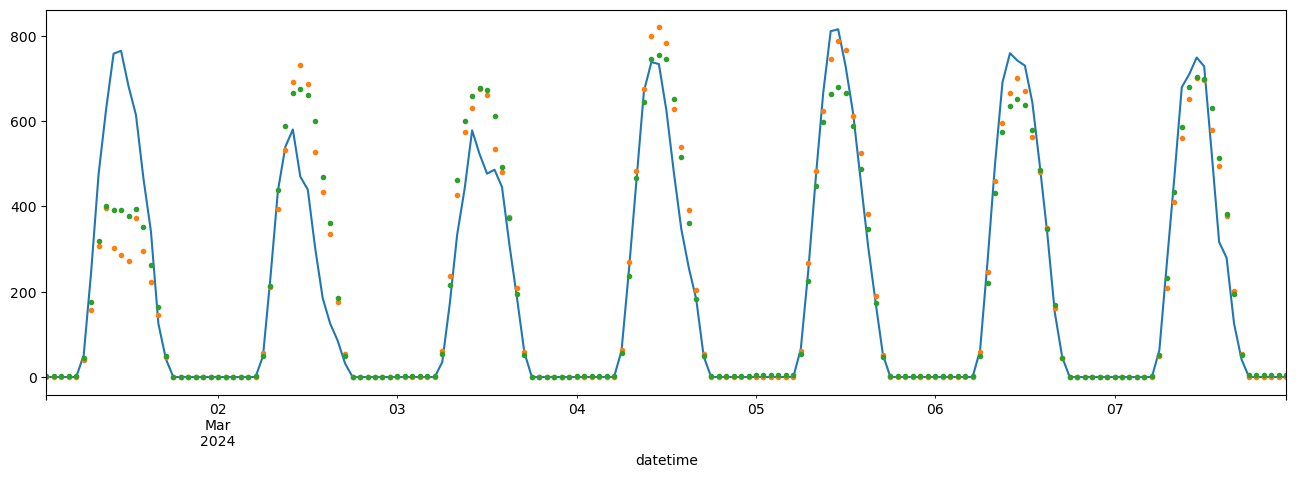

In [68]:
ax = last_df.loc[(last_df.index > '03-01-2024') & (last_df.index < '03-08-2024')]['ALLSKY_SFC_SW_DWN'].plot(figsize=(16,5))
last_df.loc[(last_df.index > '03-01-2024') & (last_df.index < '03-08-2024')]['prediction1'].plot(ax=ax, style='.')
last_df1.loc[(last_df1.index > '03-01-2024') & (last_df1.index < '03-08-2024')]['prediction2'].plot(ax=ax, style='.')
plt.show()

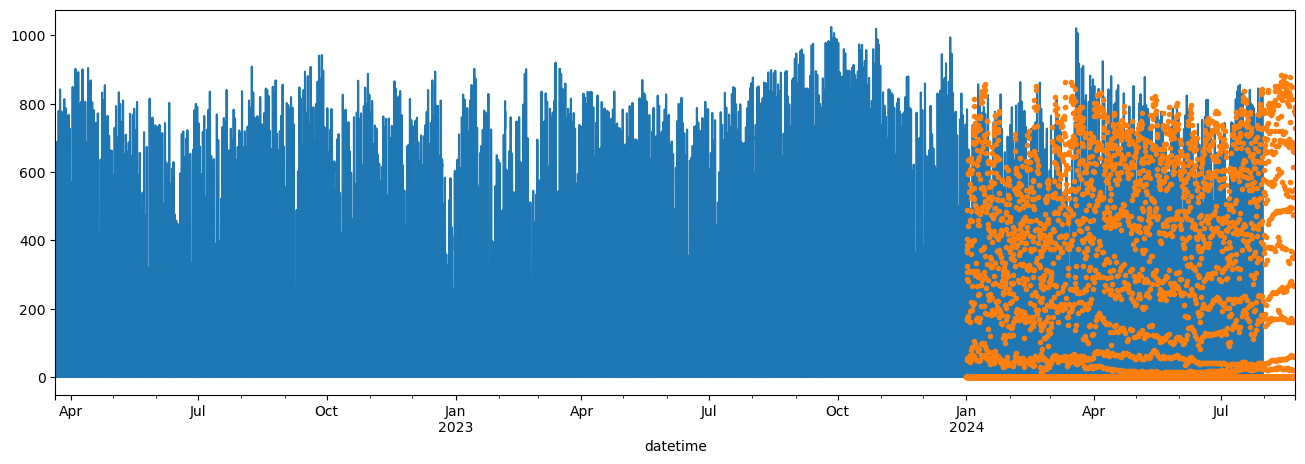

In [65]:
ax = last_df['ALLSKY_SFC_SW_DWN'].plot(figsize=(16,5))
last_df['prediction1'].plot(ax=ax, style='.')
plt.show()

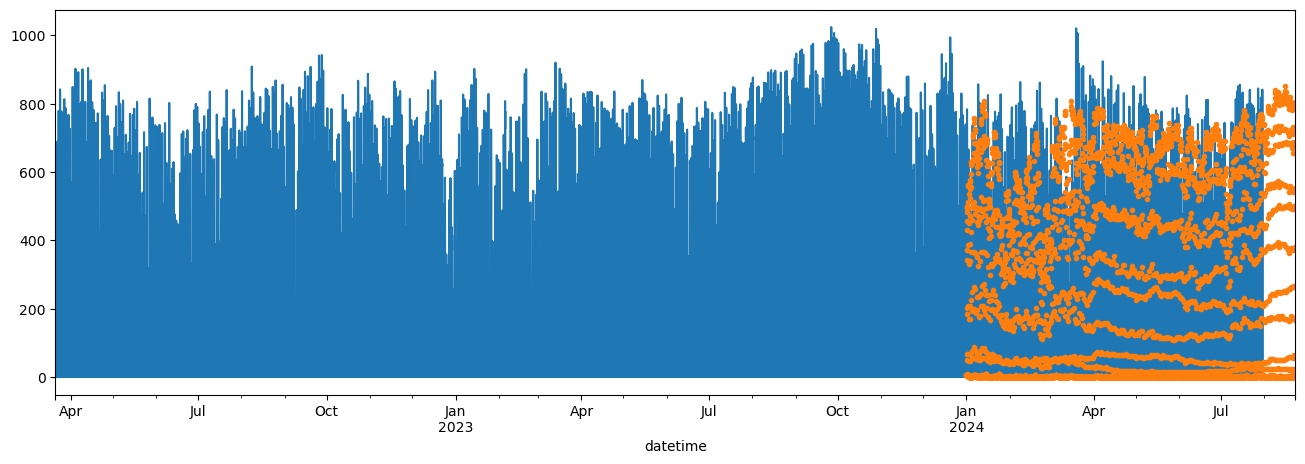

In [66]:
ax = last_df['ALLSKY_SFC_SW_DWN'].plot(figsize=(16,5))
last_df1['prediction2'].plot(ax=ax, style='.')
plt.show()